In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import rv_continuous, weibull_min, rayleigh

import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy.stats import expon

L = 0.06 / (100*1000)                # failure rate

# analyze failure probabilities over a range of hours:
T = np.arange(10000, 100000, 10000)     # range of operations hours we want to tabulate
rX = expon(0, 1/L)
F = rX.cdf(T)
dict_F = dict(zip(T, F))
print("probability of failure by T hours:")
_ = [print(f'{k:,.0f}', ":", f'{v:.5f}') for k,v in dict_F.items()]


# mean time to failure:
MTTF = rX.mean()
print("\nmean time to failure MTTF: ", f'{MTTF:,.0f}', "hours" )


probability of failure by T hours:
10,000 : 0.00598
20,000 : 0.01193
30,000 : 0.01784
40,000 : 0.02371
50,000 : 0.02955
60,000 : 0.03536
70,000 : 0.04113
80,000 : 0.04687
90,000 : 0.05257

mean time to failure MTTF:  1,666,667 hours


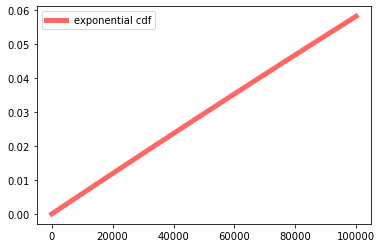

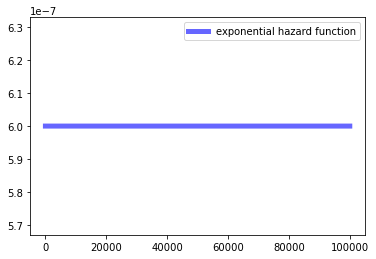

In [3]:
# plot of the failure distribution:
T = np.linspace(0, 100000, 5000)
fig, ax = plt.subplots(1, 1)
ax.plot(T, rX.cdf(T), 'r-', lw=5, alpha=0.6, label="exponential cdf")
ax.legend()

# plot the hazard function:
fig, ax = plt.subplots(1, 1)
ax.plot(T, rX.pdf(T) / rX.sf(T), 'b-', lw=5, alpha=0.6, label="exponential hazard function")
ax.legend()
pass

%failures accumulated after T hours:
0.000 : 0
0.001 : 1,668
0.010 : 16,751
0.100 : 175,601
0.200 : 371,906
0.300 : 594,458
0.400 : 851,376
0.500 : 1,155,245
0.600 : 1,527,151
0.700 : 2,006,621
0.800 : 2,682,397
0.900 : 3,837,642
0.990 : 7,675,284
0.999 : 11,512,925


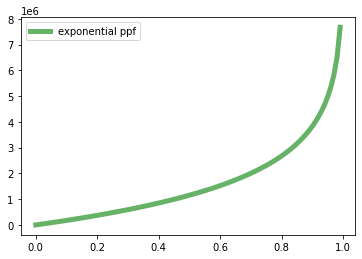

In [4]:
# selected quantiles: after how many hours should we expext q% of cumulative failures?
q1 = np.array([0.001, 0.01, 0.99, 0.999])
q2 = np.arange(0.0, 1.0, 0.1)
q = np.concatenate((q1,q2))
q.sort()
Q = rX.ppf(q)
dict_Q = dict(zip(q, Q))
print("%failures accumulated after T hours:")
_ = [print(f'{k:.3f}', ":", f'{v:,.0f}') for k,v in dict_Q.items()]


# plot of the perfent point function:
Q = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(1, 1)
ax.plot(Q, rX.ppf(Q), 'g-', lw=5, alpha=0.6, label="exponential ppf")
ax.legend()
pass

In [5]:
# system-wide  failure when 1 of N serially connected components fails

L = 0.06 / (100*1000)               # failure rate
N = 100                             # number of serially connected components
LL = L * N                          # system's failure rate

# analyze failure probabilities over a range of hours:
T = np.arange(1000, 11000, 1000)     # range of operations hours we want to tabulate
rX = expon(0, 1/LL)
F = rX.cdf(T)
dict_F = dict(zip(T, F))
print("probability of failure by T hours:")
_ = [print(f'{k:,.0f}', ":", f'{v:.5f}') for k,v in dict_F.items()]

probability of failure by T hours:
1,000 : 0.05824
2,000 : 0.11308
3,000 : 0.16473
4,000 : 0.21337
5,000 : 0.25918
6,000 : 0.30232
7,000 : 0.34295
8,000 : 0.38122
9,000 : 0.41725
10,000 : 0.45119


In [6]:
from scipy.stats import weibull_min

charlife = 50000     # characteristic life: power-on hours
shape = 1.5
loc = 0


# analyze failure probabilities over a range of hours:
T = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 100000]   # range of operations hours we want to tabulate
rW = weibull_min(shape, loc, charlife)
F = rW.cdf(T)
dict_F = dict(zip(T, F))
print("probability of failure by T hours:")
_ = [print(f'{k:,.0f}', ":", f'{v:.3f}') for k,v in dict_F.items()]


# mean time to failure:
MTTF = rW.mean()
print("\nmean time to failure MTTF: ", f'{MTTF:,.0f}', "hours" )

# failure probability at characteristic life:
P_charlife = rW.cdf(charlife)
print("\naccumulated failures at characteristic life: ", f'{P_charlife:,.3f}')


probability of failure by T hours:
100 : 0.000
500 : 0.001
1,000 : 0.003
2,000 : 0.008
5,000 : 0.031
10,000 : 0.086
20,000 : 0.224
30,000 : 0.372
100,000 : 0.941

mean time to failure MTTF:  45,137 hours

accumulated failures at characteristic life:  0.632


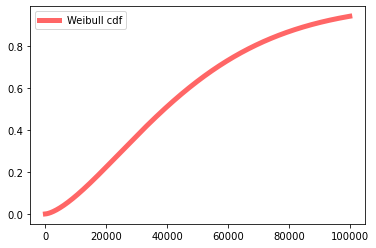

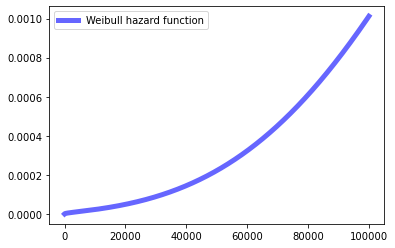

In [7]:
# plot of the failure distribution:
T = np.linspace(0, 100000, 5000)
fig, ax = plt.subplots(1, 1)
ax.plot(T, rW.cdf(T), 'r-', lw=5, alpha=0.6, label="Weibull cdf")
ax.legend()

# plot the hazard function:
fig, ax = plt.subplots(1, 1)
ax.plot(T, rW.pdf(T) / rX.sf(T), 'b-', lw=5, alpha=0.6, label="Weibull hazard function")
ax.legend()
pass

In [8]:
# failure probability at characteristic life:
P_charlife = rW.cdf(charlife)
print("accumulated failures at characteristic life: ", f'{P_charlife:,.3f}')

accumulated failures at characteristic life:  0.632


In [9]:
charlife = 50000     # characteristic life: power-on hours
shape = 1.5
loc = 0
rW = weibull_min(shape, loc, charlife)
randW = rW.rvs(100)

from scipy.stats import norm
rN = norm(0, 100)
randN = rN.rvs(100)

randWW = randW + randN

In [10]:
q632 = np.quantile(randWW, 0.632)
print(q632)
params = weibull_min.fit(randWW, loc=0, scale=q632, floc=0)
params

45338.171760168676


(1.4598772420882193, 0, 46139.38944431131)

In [11]:
# KS test for goodness of fit: p-value > 0.05 =
import scipy.stats as stats
ks = stats.kstest(randWW, weibull_min.name, params, 100)[1]   # return p-value
print(f'{ks:.3f}')

0.735


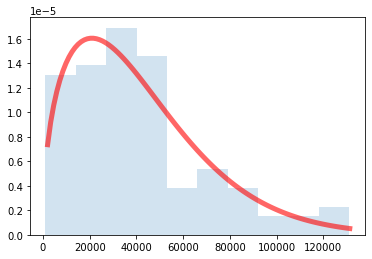

In [12]:
# plot the actual data and the fitted weibull pdf
rv = weibull_min(params[0], params[1], params[2])

x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.hist(randWW, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf')
pass

In [13]:
chars = [8000, 10000, 11000, 14000]
s = 1.5
Chars = sum([1/(c**s) for c in chars])**(-1/s)
Chars

4058.2774742324254

In [14]:
charlife = Chars     # characteristic life: power-on hours
shape = s
loc = 0

# analyze failure probabilities over a range of hours:
T = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 100000]   # range of operations hours we want to tabulate
rW = weibull_min(shape, loc, charlife)
F = rW.cdf(T)
dict_F = dict(zip(T, F))
print("probability of failure by T hours:")
_ = [print(f'{k:,.0f}', ":", f'{v:.3f}') for k,v in dict_F.items()]


# mean time to failure:
MTTF = rW.mean()
print("\nmean time to failure MTTF: ", f'{MTTF:,.0f}', "hours" )

# failure probability at characteristic life:
P_charlife = rW.cdf(charlife)
print("\naccumulated failures at characteristic life: ", f'{P_charlife:,.3f}')

probability of failure by T hours:
100 : 0.004
500 : 0.042
1,000 : 0.115
2,000 : 0.292
5,000 : 0.745
10,000 : 0.979
20,000 : 1.000
30,000 : 1.000
100,000 : 1.000

mean time to failure MTTF:  3,664 hours

accumulated failures at characteristic life:  0.632


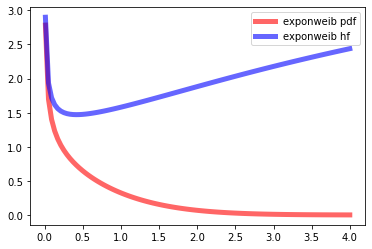

In [15]:
from scipy.stats import exponweib

a,c, scl = 0.5, 1.4, 0.5

fig, ax = plt.subplots(1, 1);
x = np.linspace(0.01, 4.0, 100)    
ax.plot(x, exponweib.pdf(x, a, c),
       'r-', lw=5, alpha=0.6, label='exponweib pdf')
ax.plot(x, exponweib.pdf(x, a, c) / exponweib.sf(x, a, c),
       'b-', lw=5, alpha=0.6, label='exponweib hf')
ax.legend()
pass

In [16]:
# define a new class qhjorth_gen: a generator for the Hjorth distribution
from scipy.stats import rv_continuous

class hjorth_gen(rv_continuous):
    '''Hjorth distribution'''
    # location m > 0
    # scale s > 0
    # shape f >= 0   => f = 0: Rayleigh
    
    def _cdf(self, x, f, m, s):
        hf1 = np.exp(-(x**2) / (2 * m**2))
        hf2 = (1 + s * x)**(-f / s) 
        hF = 1 - hf1 * hf2
        return hF 

243.7933648880287


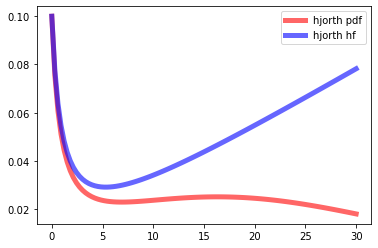

In [17]:
# instantiate and parametrize a Hjorth distribution object 
m, s, f = 20.0, 1.0, 0.1

hjorth = hjorth_gen(name="hjorth")
rvH = hjorth(f, m, s)
print(rvH.var())

x = np.linspace(0, 30.0, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rvH.pdf(x), 'r-', lw=5, alpha=0.6, label="hjorth pdf")
ax.plot(x, rvH.pdf(x) / rvH.sf(x), 'b-', lw=5, alpha=0.6, label="hjorth hf")
ax.legend()
pass